<a href="https://colab.research.google.com/github/shreyagiri98/Assignment-Topsis/blob/main/102303684_Shreya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TOPSIS Implementation

## Introduction
**TOPSIS** (Technique for Order of Preference by Similarity to Ideal Solution) is a multi-criteria decision analysis method. It is based on the concept that the chosen alternative should have the shortest geometric distance from the positive ideal solution (PIS) and the longest geometric distance from the negative ideal solution (NIS).

## Methodology
1. **Vector Normalization**: Normalize the decision matrix.
2. **Weighted Normalized Matrix**: Multiply by weights.
3. **Ideal Solutions**: Determine Ideal Best ($V^+$) and Ideal Worst ($V^-$).
4. **Separation Measures**: Calculate Euclidean distances from $V^+$ and $V^-$.
5. **Performance Score**: Calculate score $P_i = \frac{S_i^-}{S_i^+ + S_i^-}$.
6. **Ranking**: Rank alternatives based on $P_i$ (higher is better).

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def topsis(data, weights, impacts):
    data = data.astype(float)

    rss = np.sqrt(np.sum(data**2, axis=0))
    normalized_data = data / rss

    weighted_data = normalized_data * weights

    ideal_best = []
    ideal_worst = []

    for i in range(len(weights)):
        if impacts[i] == '+':
            ideal_best.append(np.max(weighted_data[:, i]))
            ideal_worst.append(np.min(weighted_data[:, i]))
        else:
            ideal_best.append(np.min(weighted_data[:, i]))
            ideal_worst.append(np.max(weighted_data[:, i]))

    ideal_best = np.array(ideal_best)
    ideal_worst = np.array(ideal_worst)

    dist_best = np.sqrt(np.sum((weighted_data - ideal_best)**2, axis=1))
    dist_worst = np.sqrt(np.sum((weighted_data - ideal_worst)**2, axis=1))

    score = dist_worst / (dist_best + dist_worst)
    return score

In [2]:
if os.path.exists('data.xlsx'):
    df = pd.read_excel('data.xlsx')
else:
    data = {
        'Fund Name': ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8'],
        'P1': [0.84, 0.91, 0.79, 0.78, 0.94, 0.88, 0.66, 0.93],
        'P2': [0.71, 0.83, 0.62, 0.61, 0.88, 0.77, 0.44, 0.86],
        'P3': [6.7, 7.0, 4.8, 6.4, 3.6, 6.5, 5.3, 3.4],
        'P4': [42.1, 31.7, 46.7, 42.4, 62.2, 51.5, 48.9, 37.0],
        'P5': [12.59, 10.11, 13.23, 12.55, 16.91, 14.91, 13.83, 10.55]
    }
    df = pd.DataFrame(data)
    print("Created sample data")

print("Original Data:")
print(df.head())

Original Data:
  Fund Name    P1    P2   P3    P4     P5
0        M1  0.84  0.71  6.7  42.1  12.59
1        M2  0.91  0.83  7.0  31.7  10.11
2        M3  0.79  0.62  4.8  46.7  13.23
3        M4  0.78  0.61  6.4  42.4  12.55
4        M5  0.94  0.88  3.6  62.2  16.91


In [3]:
numeric_data = df.iloc[:, 1:].values

weights = [1, 1, 1, 1, 1]
impacts = ['+', '+', '+', '+', '+']

scores = topsis(numeric_data, weights, impacts)

df['Topsis Score'] = scores
df['Rank'] = df['Topsis Score'].rank(ascending=False).astype(int)

print("Results:")
print(df)

Results:
  Fund Name    P1    P2   P3    P4     P5  Topsis Score  Rank
0        M1  0.84  0.71  6.7  42.1  12.59      0.563692     3
1        M2  0.91  0.83  7.0  31.7  10.11      0.513032     4
2        M3  0.79  0.62  4.8  46.7  13.23      0.439177     6
3        M4  0.78  0.61  6.4  42.4  12.55      0.491956     5
4        M5  0.94  0.88  3.6  62.2  16.91      0.641886     2
5        M6  0.88  0.77  6.5  51.5  14.91      0.738148     1
6        M7  0.66  0.44  5.3  48.9  13.83      0.407390     8
7        M8  0.93  0.86  3.4  37.0  10.55      0.408499     7


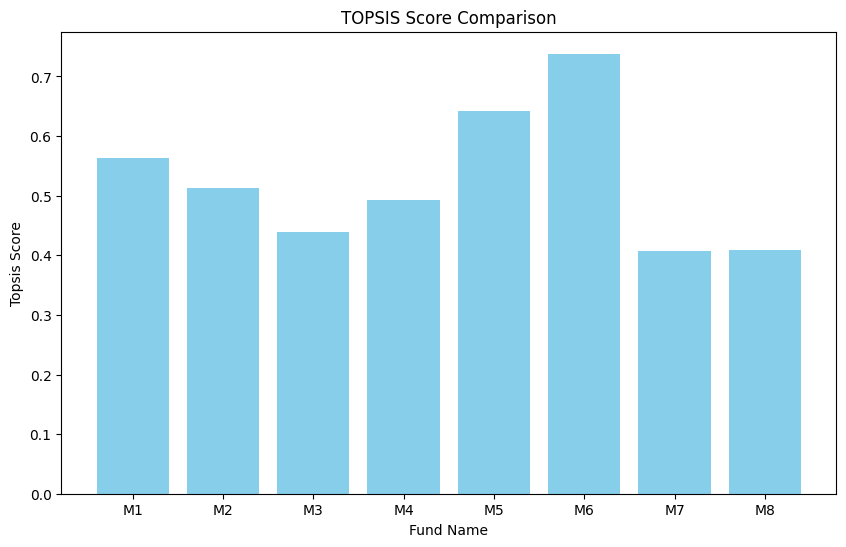

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(df['Fund Name'], df['Topsis Score'], color='skyblue')
plt.xlabel('Fund Name')
plt.ylabel('Topsis Score')
plt.title('TOPSIS Score Comparison')
plt.show()